# Conv2D Test

In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [41]:
nn.Conv2d(1, 20, 5, stride = 1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [42]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
layer = nn.Conv2d(1, 3, 3, 1).to(device)
print(layer)

Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1))


In [43]:
print(layer.weight)

Parameter containing:
tensor([[[[ 0.2479,  0.0359,  0.3122],
          [ 0.1936, -0.3291,  0.1288],
          [-0.2126,  0.2918,  0.1971]]],


        [[[-0.2275, -0.0642,  0.3185],
          [ 0.2899, -0.1235, -0.1758],
          [ 0.2900, -0.0845,  0.0733]]],


        [[[ 0.0755, -0.1130, -0.1120],
          [-0.1295, -0.0419, -0.0995],
          [-0.2857,  0.2587, -0.0457]]]], device='cuda:0', requires_grad=True)


In [44]:
print(layer.weight.shape)
# batch_size, channels, height, width

torch.Size([3, 1, 3, 3])


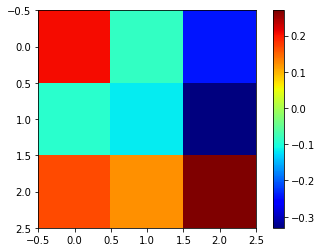

In [37]:
weight = layer.weight.cpu().numpy()

import matplotlib.pyplot as plt
plt.imshow(weight[0, 0, :, :], 'jet')
plt.colorbar()
plt.show()

In [47]:
weight[0]

array([[[ 0.20869176, -0.08326479, -0.2417957 ],
        [-0.0910238 , -0.11606678, -0.33068177],
        [ 0.168222  ,  0.12397262,  0.26981097]]], dtype=float32)

In [50]:
weight[0, 0, 0, 0]

0.20869176

In [52]:
from VGG import VGG16
from torchinfo import summary

In [53]:
model = VGG16(cifar=False)

In [54]:
summary(model, (32, 3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      --                        --
├─Sequential: 1-1                        [32, 512, 7, 7]           --
│    └─Conv2d: 2-1                       [32, 64, 224, 224]        1,792
│    └─ReLU: 2-2                         [32, 64, 224, 224]        --
│    └─Conv2d: 2-3                       [32, 64, 224, 224]        36,928
│    └─ReLU: 2-4                         [32, 64, 224, 224]        --
│    └─MaxPool2d: 2-5                    [32, 64, 112, 112]        --
│    └─Conv2d: 2-6                       [32, 128, 112, 112]       73,856
│    └─ReLU: 2-7                         [32, 128, 112, 112]       --
│    └─Conv2d: 2-8                       [32, 128, 112, 112]       147,584
│    └─ReLU: 2-9                         [32, 128, 112, 112]       --
│    └─MaxPool2d: 2-10                   [32, 128, 56, 56]         --
│    └─Conv2d: 2-11                      [32, 256, 56, 56]         29

In [ ]:
summary(model, )

- in_channel = 들어가는 이미지의 채널 수
- out_channel = 나오는 이미지의 채널 수 (사실 상 사용하고자하는 필터의 개수 라고 봐도됨)   
https://gaussian37.github.io/dl-pytorch-conv2d/

In [78]:
a = torch.rand(4,4)
a = a.view(2,2,2,2)
a

tensor([[[[0.9754, 0.2203],
          [0.0147, 0.3246]],

         [[0.7968, 0.8747],
          [0.4509, 0.3188]]],


        [[[0.2569, 0.9425],
          [0.4605, 0.6515]],

         [[0.8878, 0.1607],
          [0.1273, 0.4537]]]])

In [84]:

#torch.Size([32, 3, 224, 224]) = img
input = torch.ones(1, 1, 3, 3)
filter = torch.ones(1, 1, 3, 3)
filter



tensor([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]]])

In [69]:
input = Variable(input, requires_grad=True)
input

tensor([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]]], requires_grad=True)

In [70]:
filter = Variable(filter)

In [71]:
out = F.conv2d(input, filter)
out

tensor([[[[9.]]]], grad_fn=<ThnnConv2DBackward0>)

In [72]:
out.backward()
print(out.grad_fn)

In [73]:
print(input.grad)

tensor([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]]])


In [3]:
import torch
import torch.nn as nn

In [4]:
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))
input = torch.randn(20, 16, 50, 100)

In [5]:
output = m(input)

In [6]:
output

tensor([[[[ 1.5236e-01, -2.0190e-02,  1.2969e-03,  ...,  2.1999e-01,
            1.8128e-01, -1.5499e-02],
          [ 1.6015e-01,  1.0006e-01,  1.0854e+00,  ...,  5.6867e-01,
           -2.9877e-01, -6.3013e-01],
          [ 8.5597e-01,  2.4539e-01,  9.2964e-01,  ...,  2.4964e-01,
            1.1249e-01,  3.9981e-01],
          ...,
          [ 5.0750e-01, -5.5388e-01, -2.1930e-01,  ..., -3.7901e-01,
           -3.8659e-02, -2.6130e-01],
          [ 7.7846e-01,  1.8050e-01,  9.8319e-01,  ...,  2.2050e-01,
           -4.4687e-01,  3.9898e-01],
          [-2.7149e-01, -4.5044e-02, -3.4164e-01,  ..., -8.5719e-02,
            9.2835e-02, -1.9426e-02]],

         [[-2.4629e-01,  1.6725e-01, -4.0287e-01,  ..., -8.0961e-02,
           -2.1275e-01,  3.2420e-02],
          [-3.7525e-01, -9.4622e-02,  4.5203e-01,  ...,  3.0492e-01,
            1.0560e-01,  3.6252e-01],
          [ 1.8821e-01,  8.9942e-01, -2.8100e-01,  ...,  5.9387e-01,
           -4.7285e-01, -1.0653e-01],
          ...,
     

In [7]:
from VGG import VGG16
from torchinfo import summary

model = VGG16(cifar=False)

In [14]:
layer = nn.Conv2d(1,3,5,1)
img = torch.randn(10,1,20,20)
output = layer(img)
print(output.size())

torch.Size([10, 3, 16, 16])


https://justkode.kr/deep-learning/pytorch-cnn

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=5, stride=1)
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=5, stride=1)
        self.fc1 = nn.Linear(10 * 12 * 12, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        print("연산 전", x.size())
        x = F.relu(self.conv1(x))
        print("conv1 연산 후", x.size())
        x = F.relu(self.conv2(x))
        print("conv2 연산 후",x.size())
        x = x.view(-1, 10 * 12 * 12)
        print("차원 감소 후", x.size())
        x = F.relu(self.fc1(x))
        print("fc1 연산 후", x.size())
        x = self.fc2(x)
        print("fc2 연산 후", x.size())
        return x

cnn = CNN()
output = cnn(torch.randn(10, 1, 20, 20))  # Input Size: (10, 1, 20, 20)

연산 전 torch.Size([10, 1, 20, 20])
conv1 연산 후 torch.Size([10, 3, 16, 16])
conv2 연산 후 torch.Size([10, 10, 12, 12])
차원 감소 후 torch.Size([10, 1440])
fc1 연산 후 torch.Size([10, 50])
fc2 연산 후 torch.Size([10, 10])


# VGG + tensorboard + torchinfo + Epoch당 걸리는 시간
11.10(목)
- 코드 리뷰
    - 하나부터 열까지 다 이해함을 목표로 진행.
1. [궁금한 점 (언더바 차이)](#궁금한-점(언더바-차이))
2. [궁금한 점 (init_weight)](#궁금한-점-(init_weight))

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.utils.tensorboard import SummaryWriter

import torchvision
import torchvision.transforms as tr
import torchvision.models as models


from VGG import VGG11, VGG13, VGG16, VGG19

import os
from skimage import io, transform
from matplotlib import pyplot as plt
import re
import PIL
from PIL import Image
import glob



path = "/home/sldev1/Project/hyeongeun_test/data/FER"


''' random seed fixed'''
import random
import torch.backends.cudnn as cudnn
import numpy as np

torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)
np.random.seed(0)
cudnn.benchmark = False
cudnn.deterministic = True
random.seed(0)

In [2]:
device = 'cuda'
model = VGG16()
learning_rate =0.001
# VGG11, VGG13, VGG16, VGG19 중에 택일하여 사용

In [3]:
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform(m.weight)
    if isinstance(m, nn.Conv2d):
        torch.nn.init.kaiming_uniform(m.weight)

# for param in model.parameters():
#     print(param)

model.apply(init_weights)
for param in model.parameters():
    print(param)


# model.parameters()
# print(optimizer)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  after removing the cwd from sys.path.


Parameter containing:
tensor([[[[ 0.3167, -0.0225, -0.3773],
          [-0.0190, -0.3526,  0.4008],
          [ 0.3577,  0.2549, -0.1184]],

         [[-0.1388, -0.1577,  0.4393],
          [-0.3461,  0.2053,  0.1987],
          [-0.0589,  0.3860,  0.1560]],

         [[-0.4535,  0.3111, -0.2601],
          [ 0.0447,  0.1591,  0.1219],
          [ 0.2813,  0.4589, -0.3514]]],


        [[[-0.3050, -0.1203, -0.4311],
          [-0.1345,  0.1184, -0.4651],
          [ 0.4317, -0.1422,  0.0956]],

         [[ 0.3866, -0.1379, -0.3763],
          [-0.2488, -0.1687,  0.0793],
          [-0.4244,  0.2255, -0.4419]],

         [[ 0.0386,  0.1762,  0.1798],
          [ 0.1978, -0.3140, -0.4656],
          [-0.2590, -0.1261, -0.1784]]],


        [[[-0.3889, -0.3599,  0.2378],
          [-0.4650, -0.0930,  0.4101],
          [-0.0710, -0.2095, -0.2793]],

         [[-0.4189,  0.2223,  0.4502],
          [ 0.1052, -0.3558,  0.3318],
          [-0.1080, -0.1526, -0.0872]],

         [[ 0.0582,  0

# 궁금한 점(언더바 차이)
1. kaiming_uniform_, kaiming_uniform에서 언더바 있고 없고 차이점 궁금   
2. Vgg에서 Linear 다음도 ReLU인데, 그럼 kaiming_uniform 써야되는거 아닌지??   
    - 가져온 코드라 왜 이렇게 짰는지 궁금해서

In [4]:
# Simple Learning Rate Scheduler
def lr_scheduler(optimizer, epoch):
    lr = learning_rate
    if epoch == 50:
        lr /= 2
    if epoch == 100:
        lr /= 2
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr 

# Xavier, 가중치 초기화 부분
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform(m.weight)
    if isinstance(m, nn.Conv2d):
        torch.nn.init.kaiming_uniform(m.weight)
    # if isinstance(m, nn.ReLU):
    #     torch.nn.init.kaiming_uniform_

In [5]:
def img_load(img_path):

    jpg = glob.glob(img_path+'*.jpg')
    sort_jpg = sorted(jpg, key=lambda s: int(re.findall(r'\d+', s)[1]))
    #print("img_load def is play")
    return sort_jpg


def label_load(label_path):
    #enumerate #파이썬내장함수.. 강민규사원님은 이걸로 쓰셨는데 느리더래
    label = glob.glob(label_path+'*exp.npy')
    sort_label = sorted(label,key=lambda s: int(re.findall(r'\d+', s)[1]))
    #print("label_load def is play")
    return sort_label

class MyFERDataset(Dataset):
    
    def __init__(self, img_path_base, label_path_base, train=None, transform=None):
        super(MyFERDataset, self).__init__()
        
        if train == True:
            self.img_path = img_path_base+'/train_set/images/'
            self.label_path = label_path_base+'/train_set/annotations/'
        else:
            self.img_path = img_path_base+'/val_set/images/'
            self.label_path = label_path_base+'/val_set/annotations/'

        self.img = img_load(self.img_path)
        self.label = label_load(self.label_path)
        self.transform = transform
        
    
    def __getitem__(self, idx):
        img_read = io.imread(self.img[idx]) 
        label_read = np.load(self.label[idx])
        label_read = label_read.astype(np.int64)
        label_tr = torch.from_numpy(label_read)
        
        
        if self.transform:
            img_tr = self.transform(img_read)
        
        
        return img_tr, label_tr
    

    def __len__(self):
        return len(self.label)
    
    if __name__ == "__main__":
        print('hi, i\'m main')

hi, i'm main


In [6]:
transform_train = tr.Compose([tr.ToTensor(),
                              tr.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])
transform_test = tr.Compose([tr.ToTensor()])


train_dataset = MyFERDataset(img_path_base = path,
                              label_path_base = path,
                              train=True,
                              transform=transform_train)
test_dataset = MyFERDataset(img_path_base = path,
                              label_path_base = path,
                              train=False,
                              transform=transform_test)

In [7]:
len(train_dataset)

287651

In [8]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

In [9]:
dataiter = iter(train_loader)
images, labels = dataiter.next()

In [10]:
labels.size()
#print(images)

torch.Size([32])

In [11]:
print(labels)

tensor([1, 6, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1,
        2, 1, 1, 3, 6, 1, 1, 7])


In [17]:
device = 'cuda:1'
model = VGG16()
# VGG11, VGG13, VGG16, VGG19 중에 택일하여 사용

# 궁금한 점 (init_weight)
1. apply 함수 시퀀스 궁금. (상준선임, 민규사원님께 물어볼 것)   
    - 참고 자료 : [apply docs](https://pytorch.org/docs/stable/generated/torch.nn.Module.html)   
    - 참고 자료 : [apply source docs](https://pytorch.org/docs/stable/_modules/torch/nn/modules/module.html#Module.apply)
2. 얼마만큼 재귀적으로 불러오는지 어떻게 아는지 궁금.
    - apply시 한번만 초기화하는지?
    - 그걸 어떻게 아는지?

In [18]:
model.apply(init_weights) # 재귀적으로 모델 전체 가중치를 초기화
model = model.to(device)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  


In [19]:
learning_rate = 0.001
num_epoch = 200
model_name = '11.21_test_VGG_FER.pth'

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
train_loss = 0
valid_loss = 0
correct = 0
total_cnt = 0
best_acc = 0

In [20]:
for step, batch in enumerate(train_loader):
    #  input and target
    batch[0], batch[1] = batch[0].to(device), batch[1].to(device)
    # batch[0]은 이미지 / batch[1]은 label
    optimizer.zero_grad()
        
    logits = model(batch[0])
    loss = loss_fn(logits, batch[1])
    loss.backward()
        
    optimizer.step()
    train_loss += loss.item()
    _, predict = logits.max(1)
    #_, predict = torch.max(logits, dim=1)
    print("언더바 뭐야?:", _)
    print("predict 뭐야?:", predict)
        
    total_cnt += batch[1].size(0)
    correct +=  predict.eq(batch[1]).sum().item()

언더바 뭐야?: tensor([4.1044, 5.2745, 3.8525, 2.9334, 3.7110, 3.6706, 3.7158, 4.8056, 2.8508,
        5.8511, 3.1690, 4.4131, 3.6570, 2.6908, 3.9423, 5.1286, 4.1531, 4.4459,
        3.3950, 5.1012, 3.8586, 3.1787, 5.3820, 4.4972, 4.4083, 3.4532, 2.8505,
        2.6516, 3.0011, 3.2360, 3.8013, 3.5865], device='cuda:1',
       grad_fn=<MaxBackward0>)
predict 뭐야?: tensor([340, 105, 463, 105, 666, 587, 378, 616, 607, 401, 380,   5, 517, 820,
        988,  67, 453, 306, 918, 788, 628,  23, 694, 694, 449,  33, 878, 390,
         62, 720, 249, 919], device='cuda:1')
언더바 뭐야?: tensor([ 949.6171,  827.5279, 1111.9774, 1116.9141, 1203.8452,  768.9084,
        1233.3129,  993.1042,  894.5021,  799.5651, 1412.8164,  870.4506,
         949.7182, 1374.2351, 1213.7388, 1314.8175, 1320.6436, 1127.4514,
         927.0262, 1062.9559,  760.9074, 1077.2010, 1276.5520,  962.6379,
         895.6348, 1018.8005, 1299.7461, 1597.7148,  938.2938, 1432.2297,
         914.0516,  982.2444], device='cuda:1', grad_fn=<Max

KeyboardInterrupt: 

In [21]:
for step, batch in enumerate(train_loader):
    #  input and target
    batch[0], batch[1] = batch[0].to(device), batch[1].to(device)
    # batch[0]은 이미지 / batch[1]은 label
    optimizer.zero_grad()
        
    logits = model(batch[0])
    loss = loss_fn(logits, batch[1])
    loss.backward()
        
    optimizer.step()
    train_loss += loss.item()
    # _, predict = logits.max(1)
    _, predict = torch.max(logits, dim=1)
    print("언더바 뭐야?:", _)
    print("predict 뭐야?:", predict)
        
    total_cnt += batch[1].size(0)
    correct +=  predict.eq(batch[1]).sum().item()

언더바 뭐야?: tensor([19.2160, 18.7118, 19.2726, 17.6777, 15.5523, 16.2344, 14.6742, 12.6778,
        14.0082, 15.1977, 16.4042, 17.5307, 14.4628, 17.5812, 18.3813, 14.6231,
        13.9285, 13.1740, 14.1647, 15.8143, 16.8403, 18.8419, 23.7624, 13.3198,
        15.8044, 16.4860, 12.0268, 14.0840, 17.6964, 24.2013, 18.2587, 17.4928],
       device='cuda:1', grad_fn=<MaxBackward0>)
predict 뭐야?: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1], device='cuda:1')
언더바 뭐야?: tensor([6.7851, 5.6918, 4.1417, 5.7739, 5.5562, 5.2268, 5.0305, 5.3655, 6.1869,
        4.5705, 6.3850, 6.3605, 5.1607, 5.5506, 5.5138, 5.3165, 5.1142, 5.9143,
        6.0014, 4.9984, 6.3251, 5.2516, 5.2706, 5.2647, 6.2718, 7.3163, 6.8893,
        4.9043, 5.6526, 5.4864, 5.9449, 5.3541], device='cuda:1',
       grad_fn=<MaxBackward0>)
predict 뭐야?: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1], device=

KeyboardInterrupt: 

# 여기서 걸리는 시간 측정

In [ ]:
import time
start = time.time() #시작 시간 저장
# Train
writer = SummaryWriter()
for epoch in range(num_epoch):
    
    if epoch == 1:
        start = time.time() #시작 시간 저장
    if epoch == 2:
        epoch_time_for_1 = time.time()-start
        timer = epoch_time_for_1 * num_epoch
        print("학습에 총 걸리는 시간 :", timer)

    
    
    
    print(f"====== { epoch+1} epoch of { num_epoch } ======")
    model.train()
    lr_scheduler(optimizer, epoch)
    train_loss = 0
    valid_loss = 0
    correct = 0
    total_cnt = 0
    
    
    #writer.add_scalar('Loss/train', train_loss, epoch)
    #writer.add_scalar('Loss/valid', np.random.random(), n_iter)
    #writer.add_scalar('Accuracy/train', valid_loss, epoch)
    #writer.add_scalar('Accuracy/valid', np.random.random(), n_iter)
    
    # Train Phase
    for step, batch in enumerate(train_loader):
        #  input and target
        batch[0], batch[1] = batch[0].to(device), batch[1].to(device) # batch[0]은 이미지 / batch[1]은 label
        optimizer.zero_grad()
        
        logits = model(batch[0])
        loss = loss_fn(logits, batch[1])
        loss.backward()
        
        optimizer.step()
        train_loss += loss.item()
        _, predict = logits.max(1)
        
        total_cnt += batch[1].size(0)
        correct +=  predict.eq(batch[1]).sum().item()
        
        
        if step % 1000 == 0 and step != 0:
            print(f"\n====== { step } Step of { len(train_loader) } ======")
            print(f"Train Acc : { correct / total_cnt }")
            print(f"Train Loss : { loss.item() / batch[1].size(0) }")

    
    train_acc_visual = (correct / total_cnt) * 100
    train_loss_visual = loss.item() / batch[1].size(0)
    writer.add_scalar('acc/train', train_acc_visual, epoch)
    writer.add_scalar('loss/train', train_loss_visual, epoch)

        
            
    correct = 0
    total_cnt = 0
    
# Test Phase
    with torch.no_grad():
        model.eval()
        for step, batch in enumerate(test_loader):
            # input and target
            batch[0], batch[1] = batch[0].to(device), batch[1].to(device)
            total_cnt += batch[1].size(0)
            logits = model(batch[0])
            valid_loss += loss_fn(logits, batch[1])
            _, predict = logits.max(1)
            correct += predict.eq(batch[1]).sum().item()
        valid_acc = correct / total_cnt
        print(f"\nValid Acc : { valid_acc }")    
        print(f"Valid Loss : { valid_loss / total_cnt }")
        valid_acc_visual = valid_acc * 100
        valid_loss_visual = valid_loss / total_cnt
        writer.add_scalar('acc/valid', valid_acc_visual, epoch)
        writer.add_scalar('loss/valid', valid_loss_visual, epoch)

        if(valid_acc > best_acc):
            best_acc = valid_acc
            #torch.save(model, model_name)
            torch.save(model.state_dict(), model_name)
            print("Model Saved!")
    


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

====== 1 epoch of 200 ======

====== 1000 Step of 8990 ======
Train Acc : 0.49063436563436563
Train Loss : 0.032309286296367645

====== 2000 Step of 8990 ======
Train Acc : 0.5499437781109445
Train Loss : 0.05138865113258362

====== 3000 Step of 8990 ======
Train Acc : 0.5767556647784072
Train Loss : 0.030065201222896576

====== 4000 Step of 8990 ======
Train Acc : 0.5919145213696576
Train Loss : 0.03900831937789917


In [15]:
!tensorboard --logdir=runs

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

----
## 참고자료
- 논문 구현
    - [링크](https://cryptosalamander.tistory.com/158)
- tensorboard
    - [링크](https://gaussian37.github.io/dl-pytorch-observe/#tensorboard%EB%A5%BC-%ED%86%B5%ED%95%9C-%ED%95%99%EC%8A%B5-%ED%98%84%ED%99%A9-%ED%99%95%EC%9D%B8-1)